# 시계열 수치입력 수치예측 모델
- 코사인 데이터를 학습시킨 후, 코사인 데이터 예측

### 데이터셋 준비

In [1]:
import numpy as np
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

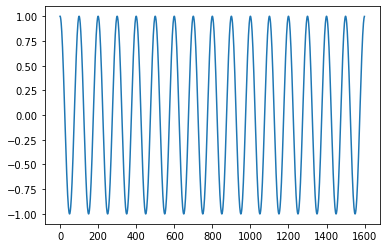

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

In [3]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

## 1. 다층 퍼셉트론 신경망 모델

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


### 모델 처리

In [8]:
model1 = Sequential()
model1.add(Dense(32, input_dim=40, activation='relu'))
model1.add(Dropout(0.3))
for i in range(2):
    model1.add(Dense(32, activation='relu'))
    model1.add(Dropout(0.3))
model1.add(Dense(1))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1312      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [10]:
model1.compile(loss='mean_squared_error', optimizer='adagrad')

In [11]:
hist1 = model1.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val))

W0910 09:53:59.207343   756 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 4s 5ms/step - loss: 0.2700 - val_loss: 0.0559
Epoch 2/200
760/760 [==============================] - 0s 146us/step - loss: 0.0839 - val_loss: 0.0305
Epoch 3/200
760/760 [==============================] - 0s 148us/step - loss: 0.0727 - val_loss: 0.0337
Epoch 4/200
760/760 [==============================] - 0s 145us/step - loss: 0.0612 - val_loss: 0.0236
Epoch 5/200
760/760 [==============================] - 0s 149us/step - loss: 0.0560 - val_loss: 0.0356
Epoch 6/200
760/760 [==============================] - 0s 153us/step - loss: 0.0452 - val_loss: 0.0223
Epoch 7/200
760/760 [==============================] - 0s 157us/step - loss: 0.0422 - val_loss: 0.0278
Epoch 8/200
760/760 [==============================] - 0s 150us/step - loss: 0.0391 - val_loss: 0.0151
Epoch 9/200
760/760 [==============================] - 0s 150us/step - loss: 0.0360 - val_loss: 0.0264
Epoch 10/200
760/760 [=======

760/760 [==============================] - 0s 147us/step - loss: 0.0102 - val_loss: 0.0065
Epoch 158/200
760/760 [==============================] - 0s 146us/step - loss: 0.0100 - val_loss: 0.0075
Epoch 159/200
760/760 [==============================] - 0s 141us/step - loss: 0.0110 - val_loss: 0.0067
Epoch 160/200
760/760 [==============================] - 0s 143us/step - loss: 0.0103 - val_loss: 0.0075
Epoch 161/200
760/760 [==============================] - 0s 142us/step - loss: 0.0104 - val_loss: 0.0075
Epoch 162/200
760/760 [==============================] - 0s 140us/step - loss: 0.0101 - val_loss: 0.0076
Epoch 163/200
760/760 [==============================] - 0s 145us/step - loss: 0.0098 - val_loss: 0.0083
Epoch 164/200
760/760 [==============================] - 0s 146us/step - loss: 0.0098 - val_loss: 0.0073
Epoch 165/200
760/760 [==============================] - 0s 140us/step - loss: 0.0098 - val_loss: 0.0072
Epoch 166/200
760/760 [==============================] - 0s 142us/ste

### 학습과정 살펴보기

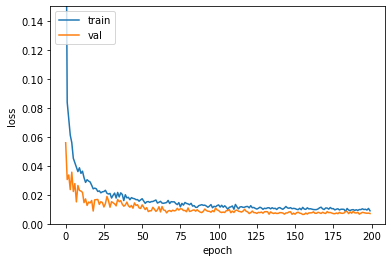

In [12]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [13]:
trainScore = model1.evaluate(x_train, y_train)
print('Train Score: ', trainScore)
valScore = model1.evaluate(x_val, y_val)
print('Validataion Score: ', valScore)
testScore = model1.evaluate(x_test, y_test)
print('Test Score: ', testScore)

760/760 [==============================] - 0s 72us/step
Train Score:  0.006973596853449156
360/360 [==============================] - 0s 73us/step
Validataion Score:  0.007093412780927288
360/360 [==============================] - 0s 73us/step
Test Score:  0.007093412780927288


### 모델 사용하기

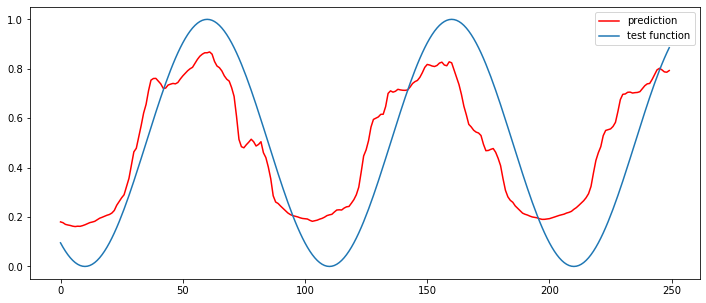

In [18]:
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model1.predict(xhat, batch_size=64)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 2. 순환신경망 모델

### 데이터셋 전처리

In [22]:
x_train.shape

(760, 40)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### 모델 처리

In [19]:
model2 = Sequential()
model2.add(LSTM(32, input_shape=(None, 1)))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
hist2 = model2.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val))

W0910 10:39:04.543223   756 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 3s 4ms/step - loss: 0.1527 - val_loss: 0.0400
Epoch 2/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0467 - val_loss: 0.0266
Epoch 3/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0330 - val_loss: 0.0234
Epoch 4/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0307 - val_loss: 0.0155
Epoch 5/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0240 - val_loss: 0.0114
Epoch 6/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0201 - val_loss: 0.0084
Epoch 7/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0148 - val_loss: 0.0042
Epoch 8/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0132 - val_loss: 0.0017
Epoch 9/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0097 - val_loss: 5.2973e-04
Epoch 10/200
760/760 [===================

Epoch 155/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 4.3863e-05
Epoch 156/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0025 - val_loss: 5.6502e-05
Epoch 157/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 1.2592e-04
Epoch 158/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0028 - val_loss: 6.6696e-05
Epoch 159/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 3.0288e-04
Epoch 160/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0026 - val_loss: 2.5385e-04
Epoch 161/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 3.4274e-05
Epoch 162/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 1.7832e-04
Epoch 163/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 2.7584e-04
Epoch 164/200
760/760 [==============

### 학습과정 살펴보기

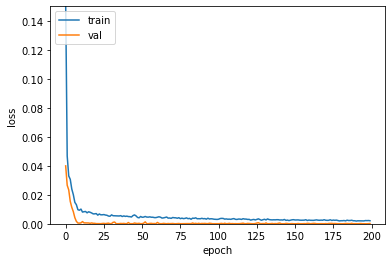

In [28]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [29]:
trainScore = model2.evaluate(x_train, y_train)
print('Train Score: ', trainScore)
valScore = model2.evaluate(x_val, y_val)
print('Validataion Score: ', valScore)
testScore = model2.evaluate(x_test, y_test)
print('Test Score: ', testScore)

760/760 [==============================] - 1s 679us/step
Train Score:  0.0001856091050860031
360/360 [==============================] - 0s 911us/step
Validataion Score:  0.0001884635945316404
360/360 [==============================] - 0s 698us/step
Test Score:  0.0001884635945316404


### 모델 사용하기

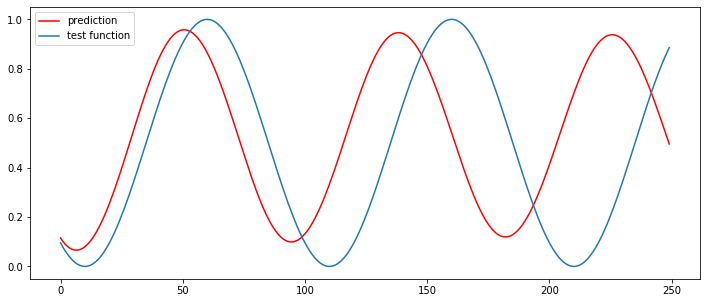

In [32]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model2.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 3. 상태유지 순환신경망 모델

In [7]:
import keras
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

### 모델 처리

In [35]:
model3 = Sequential()
model3.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model3.add(Dropout(0.3))
model3.add(Dense(1))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 32)                   4352      
_________________________________________________________________
dropout_8 (Dropout)          (1, 32)                   0         
_________________________________________________________________
dense_10 (Dense)             (1, 1)                    33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [36]:
model3.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
hist3 = CustomHistory()
hist3.init()

for i in range(10):    # 200
    model3.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, 
               validation_data=(x_val, y_val), callbacks=[hist3])
    model3.reset_states()

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 94s 123ms/step - loss: 0.0040 - val_loss: 2.3458e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 92s 122ms/step - loss: 0.0035 - val_loss: 0.0023
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 94s 124ms/step - loss: 0.0034 - val_loss: 0.0011
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 94s 123ms/step - loss: 0.0031 - val_loss: 9.3137e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 93s 122ms/step - loss: 0.0026 - val_loss: 0.0021
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 93s 123ms/step - loss: 0.0029 - val_loss: 0.0017
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 93s 1

### 학습과정 살펴보기

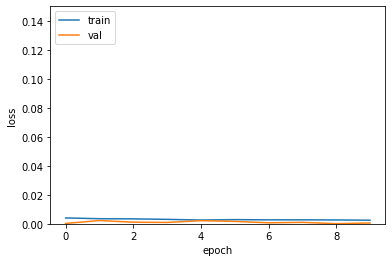

In [43]:
plt.plot(hist3.train_loss)
plt.plot(hist3.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [47]:
trainScore = model3.evaluate(x_train, y_train, batch_size=1)
model3.reset_states()
print('Train Score: ', trainScore)
valScore = model3.evaluate(x_val, y_val, batch_size=1)
model3.reset_states()
print('Validataion Score: ', valScore)
testScore = model3.evaluate(x_test, y_test, batch_size=1)
model3.reset_states()
print('Test Score: ', testScore)

760/760 [==============================] - 42s 56ms/step
Train Score:  0.0005846754603226145
360/360 [==============================] - 20s 56ms/step
Validataion Score:  0.0005728674804938944
360/360 [==============================] - 19s 53ms/step
Test Score:  0.0005728674804938944


### 모델 사용하기

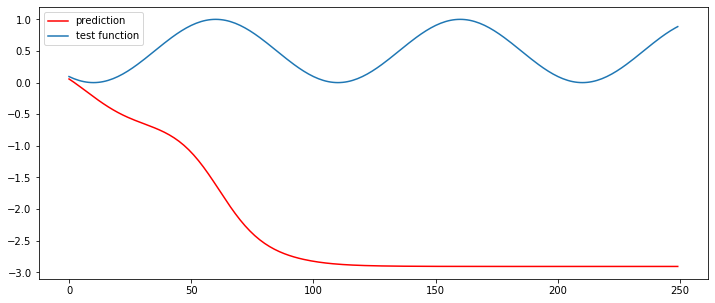

In [48]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model3.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 4. 상태유지 스택 순환신경망 모델

### 모델 처리

In [9]:
model4 = Sequential()
for i in range(2):
    model4.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model4.add(Dropout(0.3))
model4.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model4.add(Dropout(0.3))
model4.add(Dense(1))
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (1, 40, 32)               4352      
_________________________________________________________________
dropout_4 (Dropout)          (1, 40, 32)               0         
_________________________________________________________________
lstm_5 (LSTM)                (1, 40, 32)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (1, 40, 32)               0         
_________________________________________________________________
lstm_6 (LSTM)                (1, 32)                   8320      
_________________________________________________________________
dropout_6 (Dropout)          (1, 32)                   0         
_________________________________________________________________
dense_2 (Dense)              (1, 1)                   

In [12]:
model4.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
hist4 = CustomHistory()
hist4.init()

for i in range(5):    # 200
    model4.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, 
               validation_data=(x_val, y_val), callbacks=[hist4])
    model4.reset_states()

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 278s 366ms/step - loss: 0.0772 - val_loss: 0.0459
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 258s 339ms/step - loss: 0.0441 - val_loss: 0.0191
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 272s 359ms/step - loss: 0.0122 - val_loss: 0.0105
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 260s 341ms/step - loss: 0.0066 - val_loss: 0.0124
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 261s 344ms/step - loss: 0.0071 - val_loss: 0.0044


### 학습과정 살펴보기

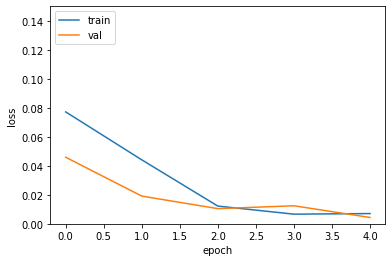

In [17]:
plt.plot(hist4.train_loss)
plt.plot(hist4.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [19]:
trainScore = model4.evaluate(x_train, y_train, batch_size=1)
model4.reset_states()
print('Train Score: ', trainScore)
valScore = model4.evaluate(x_val, y_val, batch_size=1)
model4.reset_states()
print('Validataion Score: ', valScore)
testScore = model4.evaluate(x_test, y_test, batch_size=1)
model4.reset_states()
print('Test Score: ', testScore)

760/760 [==============================] - 140s 184ms/step
Train Score:  0.004310775622156813
360/360 [==============================] - 66s 183ms/step
Validataion Score:  0.004360989162614714
360/360 [==============================] - 66s 182ms/step
Test Score:  0.004360989162614714


### 모델 사용하기

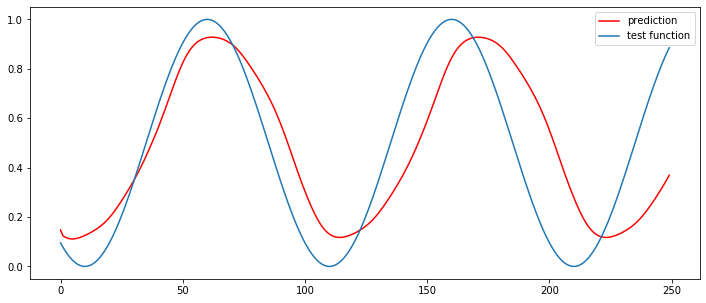

In [20]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model4.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()